In [1]:
import pandas as pd
import numpy as np
import ipaddress
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -q xlrd
from google.colab import drive
drive.mount('/content/drive')


#from google.colab import drive
#drive.mount('/drive')
#drive.mount('/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/RBA_USE2_DATSET.xlsx')
#df = pd.read_csv("/content/sample_data/rba-dataset-end.csv")
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/rba-dataset-end.csv')
df.head(2)

,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
0,15,44:30.5,-8.300000e+18,1123,82.147.58.93,NO,Oslo County,Oslo,29492,Mozilla/5.0 (iPad; CPU OS 7_1 like Mac OS X) ...,Android 2.3.3.2672,iOS 7.1,mobile,True,False,False
1,41,44:57.3,-7.000000e+18,30,81.167.44.40,NO,Oslo County,Oslo,29695,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Firefox 20.0.0.1618,iOS 11.2.6,mobile,True,False,False


In [3]:
del df['User Agent String']
del df['index']
del df['Login Timestamp']
del df['User ID']
del df['City']
df

,Round-Trip Time [ms],IP Address,Country,Region,ASN,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
0,1123,82.147.58.93,NO,Oslo County,29492,Android 2.3.3.2672,iOS 7.1,mobile,True,False,False
1,30,81.167.44.40,NO,Oslo County,29695,Firefox 20.0.0.1618,iOS 11.2.6,mobile,True,False,False
2,476,84.234.159.249,NO,Oslo County,29695,Android 2.3.3.2672,iOS 7.1,tablet,False,False,False
3,467,51.175.159.252,NO,Oslo County,29695,Chrome 69.0.3497.17.19,Android 4.1,tablet,True,False,False
4,413,10.0.61.93,NO,Oslo County,29695,Android 2.3.6,Android 8.1,mobile,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
43870,29,109.247.254.48,NO,Agder,29695,Chrome Mobile 81.0.4044,iOS 11.2.6,mobile,False,False,False
43871,18,10.0.116.239,NO,Oslo County,500001,Chrome Mobile WebView 85.0.4183,Android 2.2,mobile,True,False,False
43872,50,79.160.244.24,NO,Vestland,29695,Chrome Mobile 81.0.4044,iOS 11.2.6,mobile,True,False,False
43873,511,10.0.9.4,NO,Oslo County,207674,Opera Mobile 52.1.2254,Android 13.0,mobile,False,True,False


In [4]:
df.rename(columns={"Browser Name and Version": "Browser_Name"}, inplace=True)
df.rename(columns={"Device Type": "Device_Type"}, inplace=True)
df.rename(columns={"Round-Trip Time [ms]": "Round_Trip_Time"}, inplace=True)
df.rename(columns={"Login Successful": "Login_Successful"}, inplace=True)
df.rename(columns={"Is Attack IP": "Is_Attack_IP"}, inplace=True)
df.rename(columns={"Is Account Takeover": "Is_Account_Takeover"}, inplace=True)
df.rename(columns={"OS Name and Version": "OS_Name"}, inplace=True)

In [5]:
#Remove verions
df['Browser_Name'] = df['Browser_Name'].str.replace('\d+', '')
df['Browser_Name'] = df['Browser_Name'].str.replace('.', '')
df['OS_Name'] = df['OS_Name'].str.replace('\d+', '')
df['OS_Name'] = df['OS_Name'].str.replace('.', '')
df

<ipython-input-5-c0a9c15e420d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Browser_Name'] = df['Browser_Name'].str.replace('\d+', '')
<ipython-input-5-c0a9c15e420d>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Browser_Name'] = df['Browser_Name'].str.replace('.', '')
<ipython-input-5-c0a9c15e420d>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['OS_Name'] = df['OS_Name'].str.replace('\d+', '')
<ipython-input-5-c0a9c15e420d>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['OS_Name'] = df['OS_Name'].str.replace('.', '')


,Round_Trip_Time,IP Address,Country,Region,ASN,Browser_Name,OS_Name,Device_Type,Login_Successful,Is_Attack_IP,Is_Account_Takeover
0,1123,82.147.58.93,NO,Oslo County,29492,Android,iOS,mobile,True,False,False
1,30,81.167.44.40,NO,Oslo County,29695,Firefox,iOS,mobile,True,False,False
2,476,84.234.159.249,NO,Oslo County,29695,Android,iOS,tablet,False,False,False
3,467,51.175.159.252,NO,Oslo County,29695,Chrome,Android,tablet,True,False,False
4,413,10.0.61.93,NO,Oslo County,29695,Android,Android,mobile,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
43870,29,109.247.254.48,NO,Agder,29695,Chrome Mobile,iOS,mobile,False,False,False
43871,18,10.0.116.239,NO,Oslo County,500001,Chrome Mobile WebView,Android,mobile,True,False,False
43872,50,79.160.244.24,NO,Vestland,29695,Chrome Mobile,iOS,mobile,True,False,False
43873,511,10.0.9.4,NO,Oslo County,207674,Opera Mobile,Android,mobile,False,True,False


In [6]:
# A function to check if IP is global or private
def check_ip(ip):
    try:
        ip_address = ipaddress.IPv4Address(ip)
        if ip_address.is_private:
            return 'Private'
        elif ip_address.is_global:
            return 'Global'
    except ValueError:
        return 'invalid'

df['IP Address'] = df['IP Address'].apply(check_ip)
df

,Round_Trip_Time,IP Address,Country,Region,ASN,Browser_Name,OS_Name,Device_Type,Login_Successful,Is_Attack_IP,Is_Account_Takeover
0,1123,Global,NO,Oslo County,29492,Android,iOS,mobile,True,False,False
1,30,Global,NO,Oslo County,29695,Firefox,iOS,mobile,True,False,False
2,476,Global,NO,Oslo County,29695,Android,iOS,tablet,False,False,False
3,467,Global,NO,Oslo County,29695,Chrome,Android,tablet,True,False,False
4,413,Private,NO,Oslo County,29695,Android,Android,mobile,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
43870,29,Global,NO,Agder,29695,Chrome Mobile,iOS,mobile,False,False,False
43871,18,Private,NO,Oslo County,500001,Chrome Mobile WebView,Android,mobile,True,False,False
43872,50,Global,NO,Vestland,29695,Chrome Mobile,iOS,mobile,True,False,False
43873,511,Private,NO,Oslo County,207674,Opera Mobile,Android,mobile,False,True,False


In [7]:
df.shape

(43875, 11)

In [8]:
df['Is_Attack_IP'].value_counts()

False    43220
True       655
Name: Is_Attack_IP, dtype: int64

In [9]:
df.sort_index(axis=1).head(3)

,ASN,Browser_Name,Country,Device_Type,IP Address,Is_Account_Takeover,Is_Attack_IP,Login_Successful,OS_Name,Region,Round_Trip_Time
0,29492,Android,NO,mobile,Global,False,False,True,iOS,Oslo County,1123
1,29695,Firefox,NO,mobile,Global,False,False,True,iOS,Oslo County,30
2,29695,Android,NO,tablet,Global,False,False,False,iOS,Oslo County,476


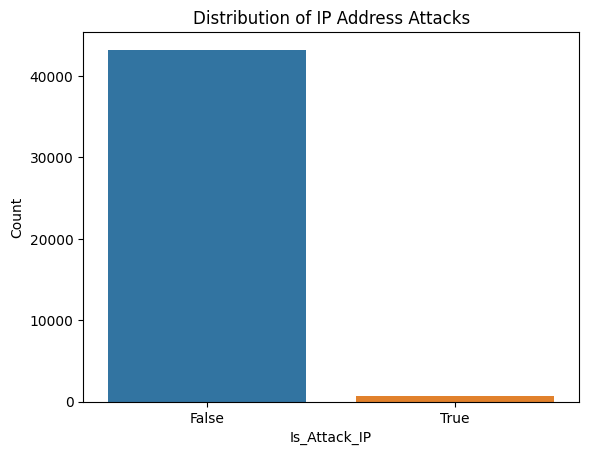

In [10]:
sns.countplot(x ='Is_Attack_IP', data = df)


plt.title('Distribution of IP Address Attacks')
plt.xlabel('Is_Attack_IP')
plt.ylabel('Count')
plt.show()

In [11]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

print('No ip attack', round(df['Is_Attack_IP'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('ip is attack', round(df['Is_Attack_IP'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Is_Attack_IP', axis=1)
y = df['Is_Attack_IP']

skf = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# See if  the train label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

print('\nLabel Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_train))

print('No ip attack', round(len(y_train[y_train==0])/len(X_train) * 100,2), '% of the dataset')
print('ip is attack', round(len(y_train[y_train==1])/len(X_train) * 100,2), '% of the dataset')


No ip attack 98.51 % of the dataset
ip is attack 1.49 % of the dataset

Label Distributions: 

[0.98505875 0.01494125]
[0.10945097 0.00164607]
No ip attack 98.51 % of the dataset
ip is attack 1.49 % of the dataset


In [12]:
train_df = X_train.copy()
train_df['Is_Attack_IP'] = y_train
train_df.shape

(39488, 11)

In [13]:
train_df['Is_Attack_IP'].value_counts()

False    38898
True       590
Name: Is_Attack_IP, dtype: int64

In [14]:
# Class count
count_class_false, count_class_true = train_df.Is_Attack_IP.value_counts()

# Divide by class
train_df_0 = train_df[train_df['Is_Attack_IP'] == False]
train_df_1 = train_df[train_df['Is_Attack_IP'] == True]

train_df_0_under = train_df_0.sample(count_class_true)
train_df_under = pd.concat([train_df_0_under, train_df_1], axis=0)
#under-sampling, the simplest technique involves removing random records from the majority class, which can cause a loss of information.This will make majority class equal to minority class.
print('Random under-sampling:')
print(train_df_under.Is_Attack_IP.value_counts())


Random under-sampling:
False    590
True     590
Name: Is_Attack_IP, dtype: int64


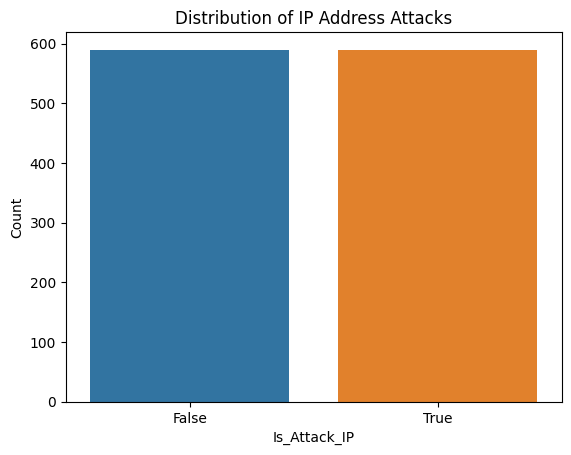

In [15]:
sns.countplot(x ='Is_Attack_IP', data=train_df_under)


plt.title('Distribution of IP Address Attacks')
plt.xlabel('Is_Attack_IP')
plt.ylabel('Count')
plt.show()

In [16]:
#Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.
train_df_1_over = train_df_1.sample(count_class_false, replace=True)
train_df_over = pd.concat([train_df_0, train_df_1_over], axis=0)

print('Random over-sampling:')
print(train_df_over.Is_Attack_IP.value_counts())



Random over-sampling:
False    38898
True     38898
Name: Is_Attack_IP, dtype: int64


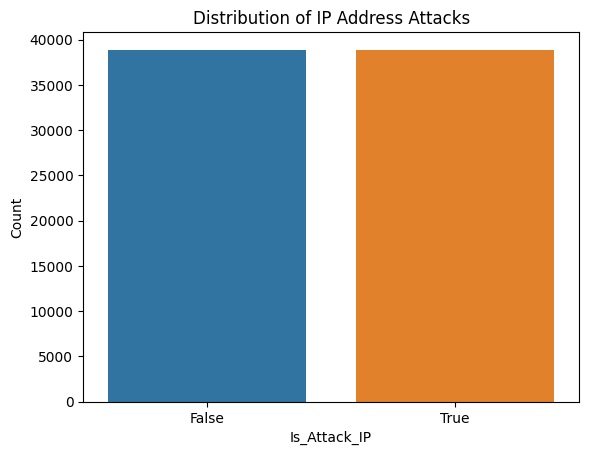

In [17]:
sns.countplot(x ='Is_Attack_IP', data=train_df_over)


plt.title('Distribution of IP Address Attacks')
plt.xlabel('Is_Attack_IP')
plt.ylabel('Count')
plt.show()

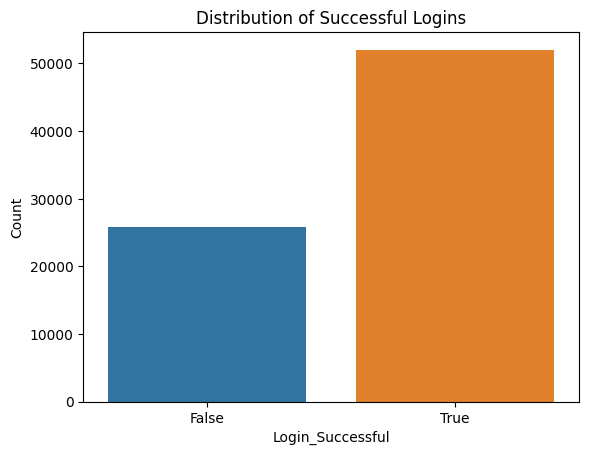

In [18]:
sns.countplot(x ='Login_Successful', data = train_df_over)

plt.title('Distribution of Successful Logins')
plt.xlabel('Login_Successful')
plt.ylabel('Count')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Oslo County'),
  Text(1, 0, 'Innlandet'),
  Text(2, 0, 'Vestfold og Telemark'),
  Text(3, 0, 'Troms og Finnmark'),
  Text(4, 0, 'Viken'),
  Text(5, 0, 'Vestland'),
  Text(6, 0, 'Agder'),
  Text(7, 0, 'Trøndelag'),
  Text(8, 0, 'Rogaland'),
  Text(9, 0, 'Nordland'),
  Text(10, 0, 'Møre og Romsdal')])

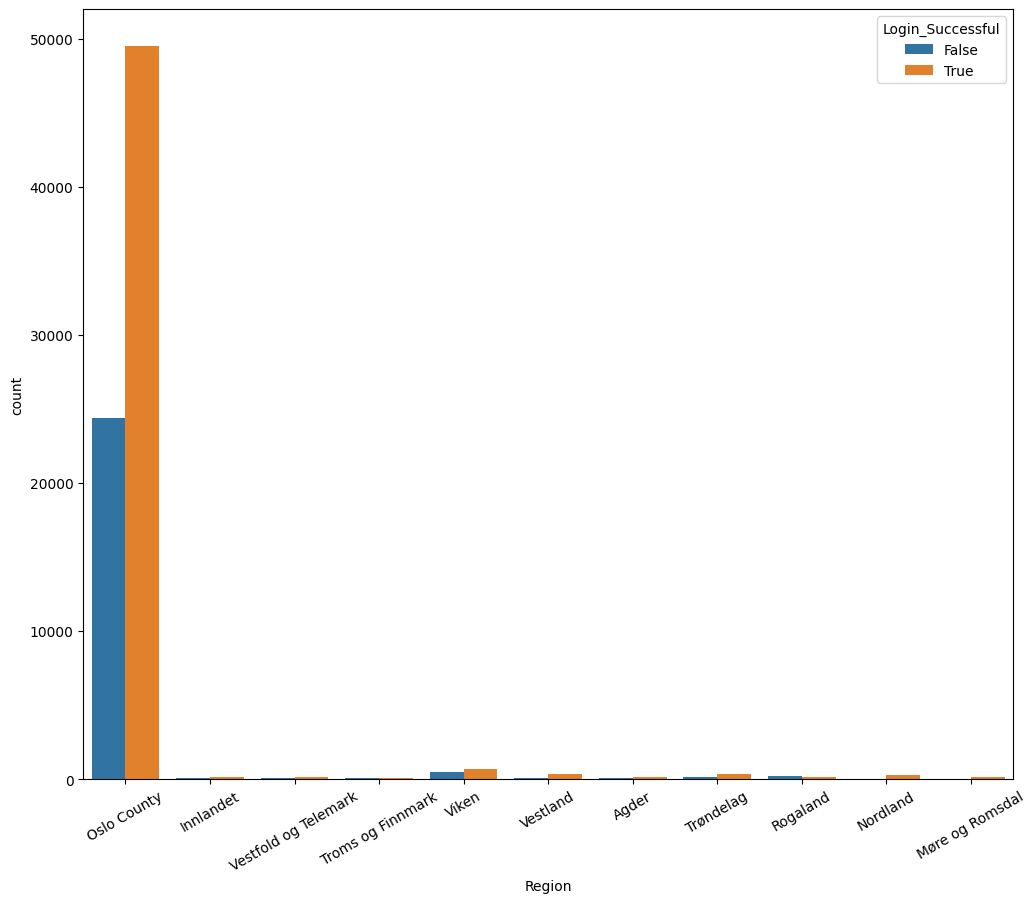

In [19]:
plt.figure(figsize=(12,10))
sns.countplot(data=train_df_over, x="Region", hue="Login_Successful")
plt.xticks(rotation=30)

<Axes: xlabel='IP Address', ylabel='count'>

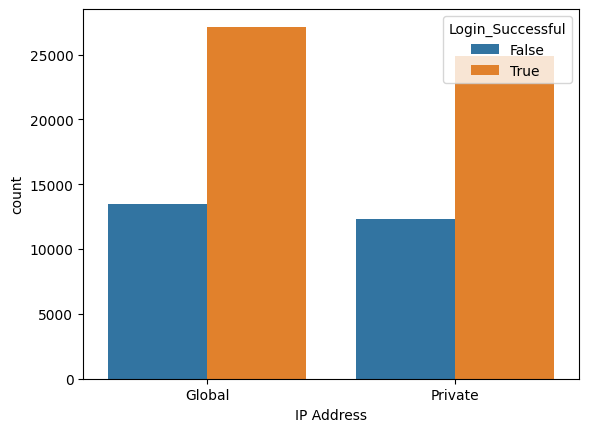

In [20]:
#plt.figure(figsize=(16,14))
sns.countplot(data=train_df_over, x="IP Address", hue="Login_Successful")
#plt.xticks(rotation=30)

### Expand Categorical features:

In [21]:
new_df = pd.get_dummies(train_df_over)
new_df

,Round_Trip_Time,ASN,Login_Successful,Is_Account_Takeover,Is_Attack_IP,IP Address_Global,IP Address_Private,Country_NO,Region_Agder,Region_Innlandet,...,OS_Name_Android zh,OS_Name_BlackBerry OS,OS_Name_KaiOS,OS_Name_MeeGo,OS_Name_Other,OS_Name_Windows,OS_Name_Windows Phone,OS_Name_iOS,Device_Type_mobile,Device_Type_tablet
0,1123,29492,True,False,False,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,30,29695,True,False,False,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,476,29695,False,False,False,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,467,29695,True,False,False,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,413,29695,True,False,False,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37368,1276,57963,False,False,True,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
25751,658,29695,True,False,True,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
10169,657,500021,True,False,True,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
12813,44,207674,True,False,True,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


###Data Visualization

In [22]:
#Boolean classification
new_df.replace({False: 0, True: 1}, inplace=True)
new_df

,Round_Trip_Time,ASN,Login_Successful,Is_Account_Takeover,Is_Attack_IP,IP Address_Global,IP Address_Private,Country_NO,Region_Agder,Region_Innlandet,...,OS_Name_Android zh,OS_Name_BlackBerry OS,OS_Name_KaiOS,OS_Name_MeeGo,OS_Name_Other,OS_Name_Windows,OS_Name_Windows Phone,OS_Name_iOS,Device_Type_mobile,Device_Type_tablet
0,1123,29492,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,30,29695,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,476,29695,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,467,29695,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,413,29695,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37368,1276,57963,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
25751,658,29695,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
10169,657,500021,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
12813,44,207674,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
# y includes our labels and x includes our features
y = new_df.Is_Attack_IP                         # Y or N 
list = ['Is_Attack_IP']
x = new_df.drop(list,axis = 1 )
x.head()

,Round_Trip_Time,ASN,Login_Successful,Is_Account_Takeover,IP Address_Global,IP Address_Private,Country_NO,Region_Agder,Region_Innlandet,Region_Møre og Romsdal,...,OS_Name_Android zh,OS_Name_BlackBerry OS,OS_Name_KaiOS,OS_Name_MeeGo,OS_Name_Other,OS_Name_Windows,OS_Name_Windows Phone,OS_Name_iOS,Device_Type_mobile,Device_Type_tablet
0,1123,29492,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,30,29695,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,476,29695,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,467,29695,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,413,29695,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Round_Trip_Time'),
  Text(1, 0, 'ASN'),
  Text(2, 0, 'Login_Successful'),
  Text(3, 0, 'Is_Account_Takeover'),
  Text(4, 0, 'IP Address_Global'),
  Text(5, 0, 'IP Address_Private'),
  Text(6, 0, 'Country_NO'),
  Text(7, 0, 'Region_Agder'),
  Text(8, 0, 'Region_Innlandet'),
  Text(9, 0, 'Region_Møre og Romsdal')])

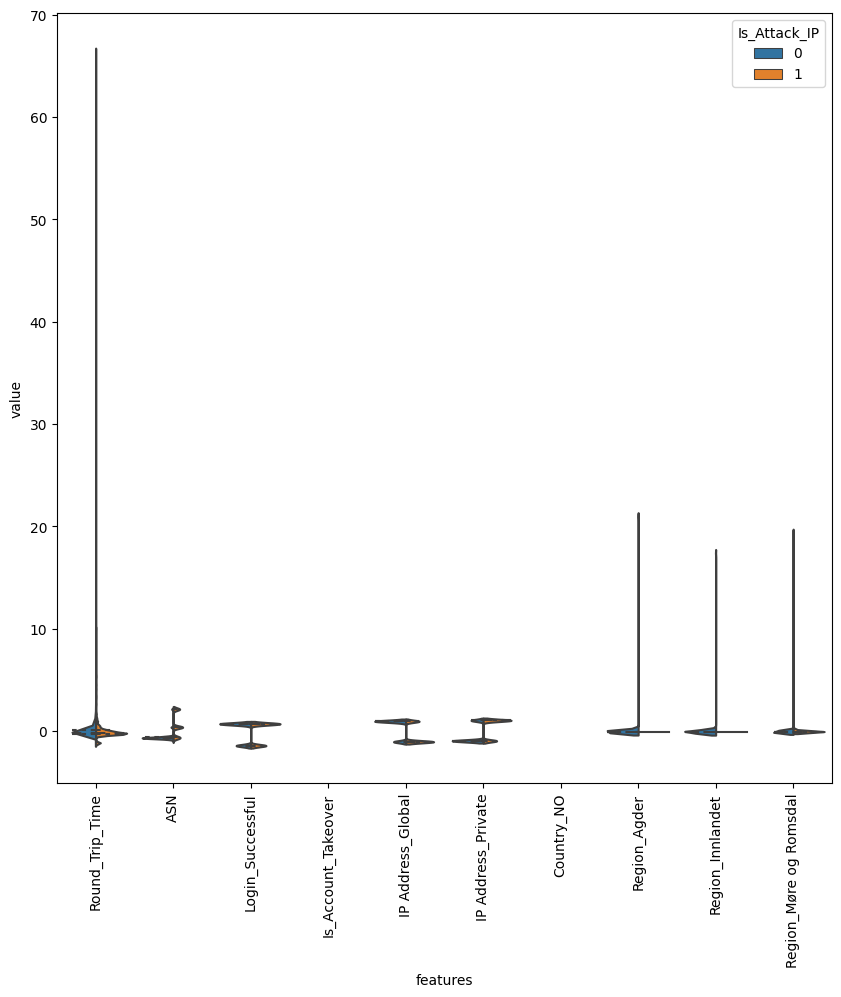

In [24]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="Is_Attack_IP",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Is_Attack_IP", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Region_Nordland'),
  Text(1, 0, 'Region_Oslo County'),
  Text(2, 0, 'Region_Rogaland'),
  Text(3, 0, 'Region_Troms og Finnmark'),
  Text(4, 0, 'Region_Trøndelag'),
  Text(5, 0, 'Region_Vestfold og Telemark'),
  Text(6, 0, 'Region_Vestland'),
  Text(7, 0, 'Region_Viken'),
  Text(8, 0, 'Browser_Name_Android '),
  Text(9, 0, 'Browser_Name_AwarioSmartBot ')])

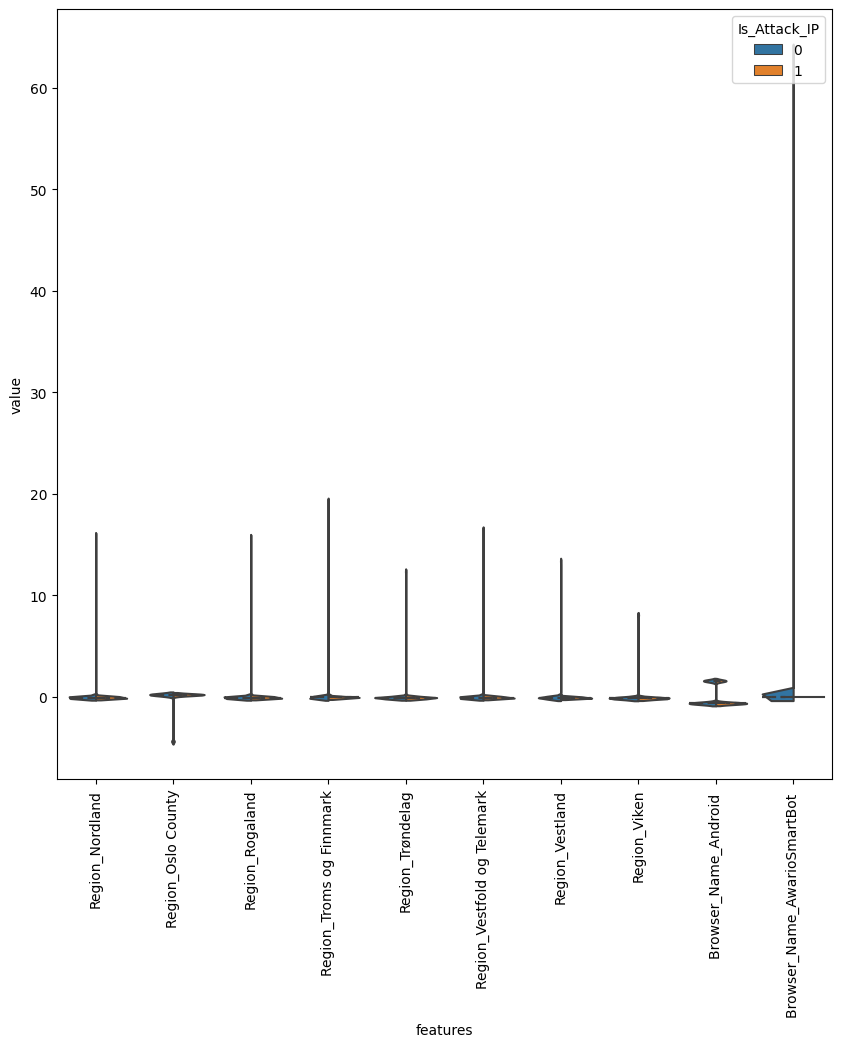

In [25]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="Is_Attack_IP",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Is_Attack_IP", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Browser_Name_Chrome '),
  Text(1, 0, 'Browser_Name_Chrome Mobile '),
  Text(2, 0, 'Browser_Name_Chrome Mobile WebView '),
  Text(3, 0, 'Browser_Name_Chrome Mobile iOS '),
  Text(4, 0, 'Browser_Name_Edge Mobile '),
  Text(5, 0, 'Browser_Name_Facebook '),
  Text(6, 0, 'Browser_Name_Firefox '),
  Text(7, 0, 'Browser_Name_Firefox Mobile '),
  Text(8, 0, 'Browser_Name_Firefox iOS '),
  Text(9, 0, 'Browser_Name_Google '),
  Text(10, 0, 'Browser_Name_IE Mobile ')])

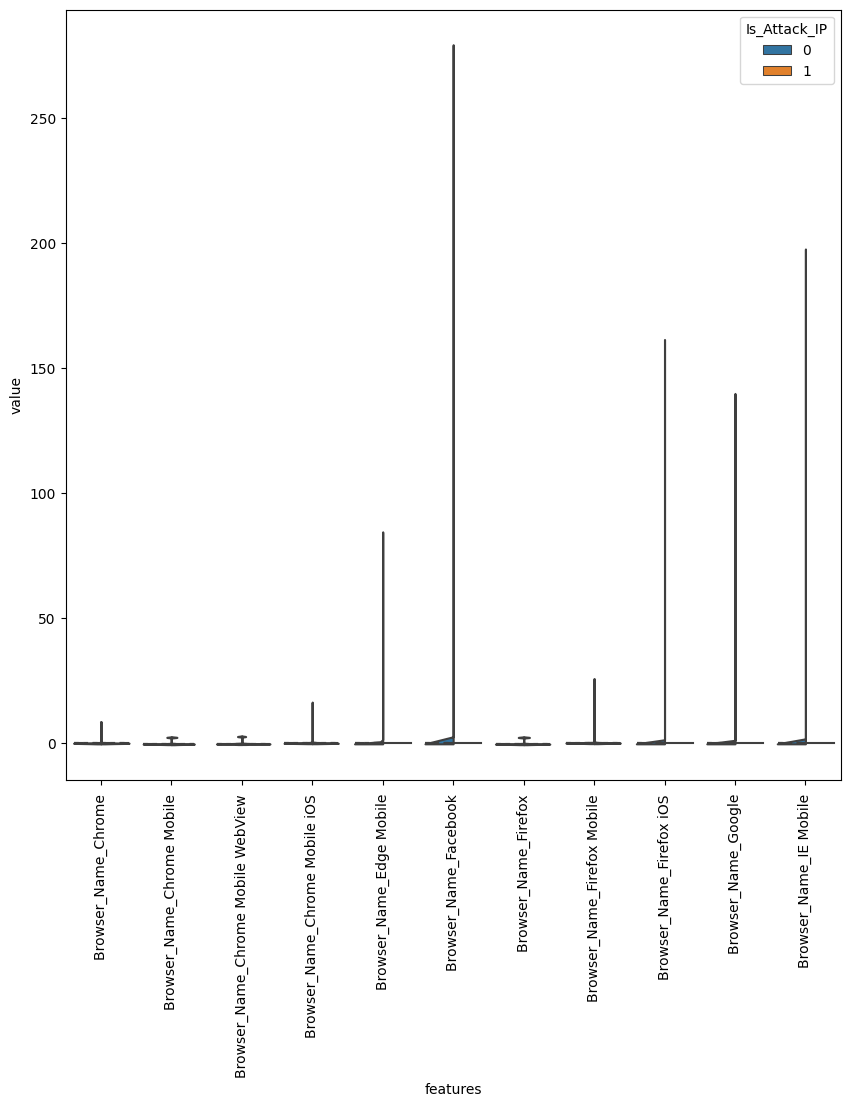

In [26]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="Is_Attack_IP",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Is_Attack_IP", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Browser_Name_Iron '),
  Text(1, 0, 'Browser_Name_MiuiBrowser '),
  Text(2, 0, 'Browser_Name_Mobile Safari '),
  Text(3, 0, 'Browser_Name_Mobile Safari UI/WKWebView '),
  Text(4, 0, 'Browser_Name_Opera Mini '),
  Text(5, 0, 'Browser_Name_Opera Mobile '),
  Text(6, 0, 'Browser_Name_Other '),
  Text(7, 0, 'Browser_Name_Password '),
  Text(8, 0, 'Browser_Name_Samsung Internet '),
  Text(9, 0, 'Browser_Name_Snapchat '),
  Text(10, 0, 'Browser_Name_Tablet Android _ Browser ')])

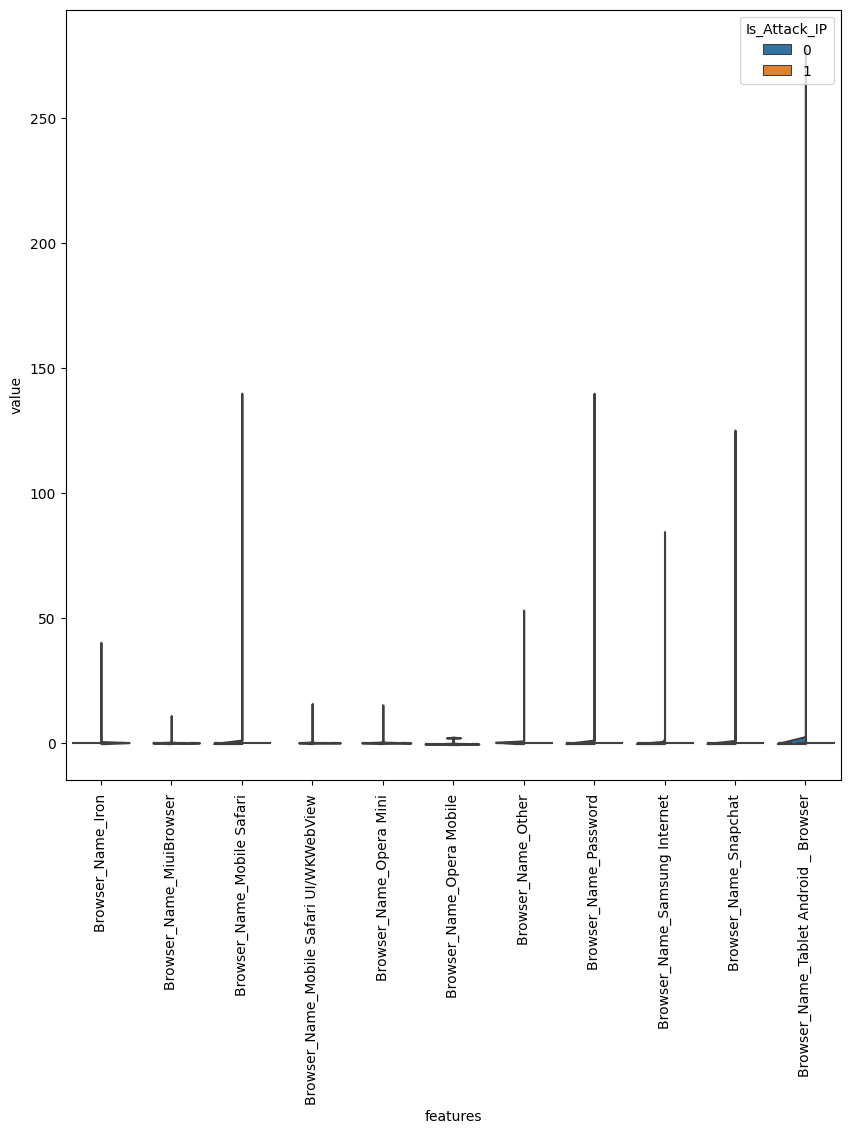

In [27]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,31:42]],axis=1)
data = pd.melt(data,id_vars="Is_Attack_IP",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Is_Attack_IP", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Browser_Name_UC Browser '),
  Text(1, 0, 'OS_Name_Android '),
  Text(2, 0, 'OS_Name_Android zh'),
  Text(3, 0, 'OS_Name_BlackBerry OS '),
  Text(4, 0, 'OS_Name_KaiOS '),
  Text(5, 0, 'OS_Name_MeeGo '),
  Text(6, 0, 'OS_Name_Other '),
  Text(7, 0, 'OS_Name_Windows '),
  Text(8, 0, 'OS_Name_Windows Phone '),
  Text(9, 0, 'OS_Name_iOS '),
  Text(10, 0, 'Device_Type_mobile')])

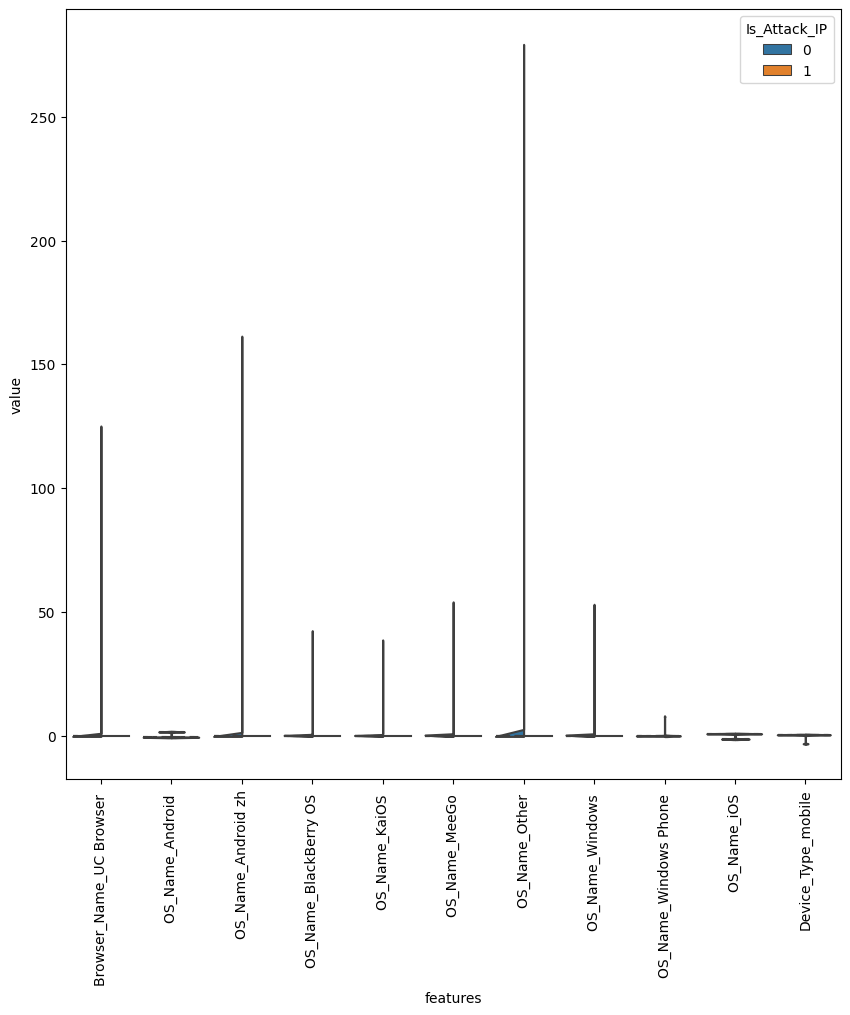

In [28]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,42:53]],axis=1)
data = pd.melt(data,id_vars="Is_Attack_IP",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Is_Attack_IP", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0]), [Text(0, 0, 'Device_Type_tablet')])

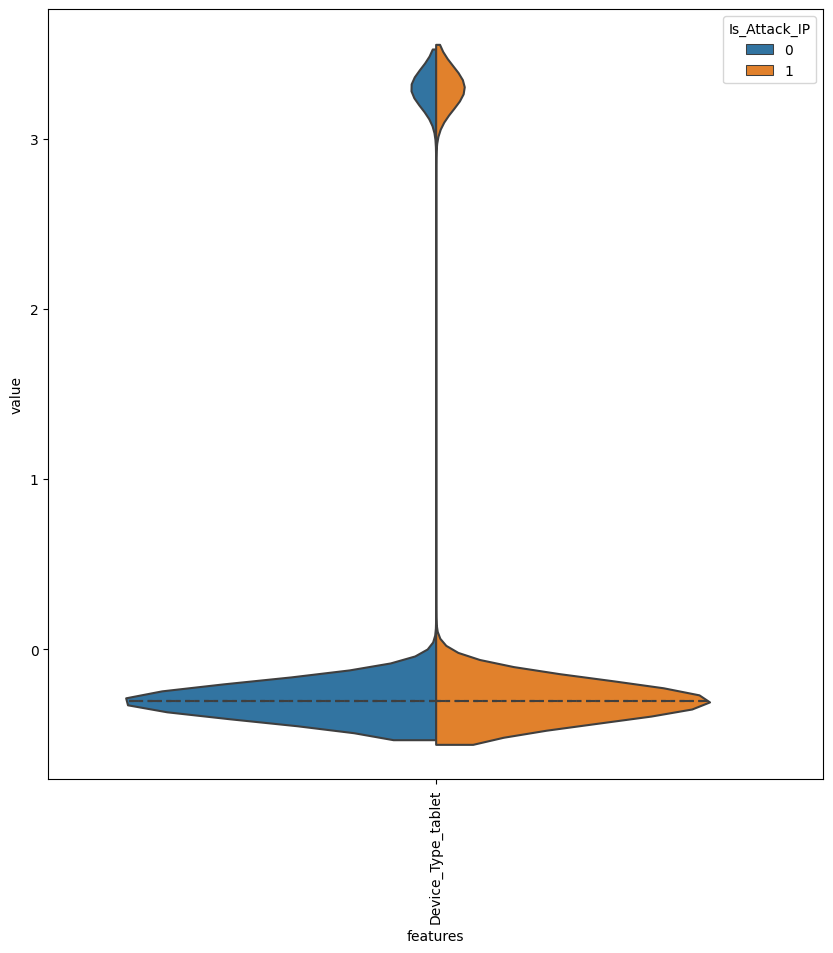

In [29]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,53:64]],axis=1)
data = pd.melt(data,id_vars="Is_Attack_IP",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Is_Attack_IP", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

Split data in two parts : data + target variable

In [30]:
#y = new_df.pop('Is_Attack_IP')
#X = new_df
X = new_df.drop(['Is_Attack_IP', 'Is_Account_Takeover', 'Country_NO'], axis = 1) # We drop our "target" feature and use all the remaining features in our dataframe to train the model.
X.head()

,Round_Trip_Time,ASN,Login_Successful,IP Address_Global,IP Address_Private,Region_Agder,Region_Innlandet,Region_Møre og Romsdal,Region_Nordland,Region_Oslo County,...,OS_Name_Android zh,OS_Name_BlackBerry OS,OS_Name_KaiOS,OS_Name_MeeGo,OS_Name_Other,OS_Name_Windows,OS_Name_Windows Phone,OS_Name_iOS,Device_Type_mobile,Device_Type_tablet
0,1123,29492,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,30,29695,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2,476,29695,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,467,29695,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,413,29695,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [31]:
y = new_df['Is_Attack_IP']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Is_Attack_IP, dtype: int64

### Standardize the Data

In [32]:
from sklearn.preprocessing import StandardScaler
# create scaler
scaler = StandardScaler()
# transformed the feature
#standardized = scaler.fit_transform(new_df)
x_scaled = pd.DataFrame(scaler.fit_transform(X),
        columns=X.columns)
y_scaled = pd.DataFrame(
        scaler.fit_transform(y.to_numpy().reshape((-1, 1))),
        columns=['Is_Attack_IP'])

### Split data in train, test splits

In [33]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.25, random_state=101)


In [34]:
from collections import Counter
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])



The number of records in the training dataset is 58347
The number of records in the test dataset is 19449


In [35]:
X_train

,Round_Trip_Time,ASN,Login_Successful,IP Address_Global,IP Address_Private,Region_Agder,Region_Innlandet,Region_Møre og Romsdal,Region_Nordland,Region_Oslo County,...,OS_Name_Android zh,OS_Name_BlackBerry OS,OS_Name_KaiOS,OS_Name_MeeGo,OS_Name_Other,OS_Name_Windows,OS_Name_Windows Phone,OS_Name_iOS,Device_Type_mobile,Device_Type_tablet
21242,0.218789,-0.523981,-1.421732,0.957112,-0.957112,-0.047618,-0.057459,-0.051401,-0.062737,0.228551,...,-0.00621,-0.023789,-0.02611,-0.018633,-0.003585,-0.018975,-0.130821,0.710300,0.302980,-0.302980
51481,-0.071350,2.141055,0.703368,-1.044810,1.044810,-0.047618,-0.057459,-0.051401,-0.062737,0.228551,...,-0.00621,-0.023789,-0.02611,-0.018633,-0.003585,-0.018975,-0.130821,0.710300,0.302980,-0.302980
63075,0.599720,0.378582,0.703368,-1.044810,1.044810,-0.047618,-0.057459,-0.051401,-0.062737,0.228551,...,-0.00621,-0.023789,-0.02611,-0.018633,-0.003585,-0.018975,-0.130821,-1.407857,0.302980,-0.302980
11687,0.581956,-0.625258,-1.421732,0.957112,-0.957112,-0.047618,-0.057459,-0.051401,-0.062737,0.228551,...,-0.00621,-0.023789,-0.02611,-0.018633,-0.003585,-0.018975,-0.130821,0.710300,0.302980,-0.302980
39908,-0.229249,2.141055,0.703368,-1.044810,1.044810,-0.047618,-0.057459,-0.051401,-0.062737,0.228551,...,-0.00621,-0.023789,-0.02611,-0.018633,-0.003585,-0.018975,-0.130821,0.710300,-3.300545,3.300545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55293,1.187894,-0.694401,0.703368,0.957112,-0.957112,-0.047618,-0.057459,-0.051401,-0.062737,0.228551,...,-0.00621,-0.023789,-0.02611,-0.018633,-0.003585,-0.018975,-0.130821,-1.407857,0.302980,-0.302980
49751,-0.262803,-0.625258,0.703368,0.957112,-0.957112,-0.047618,-0.057459,-0.051401,-0.062737,0.228551,...,-0.00621,-0.023789,-0.02611,-0.018633,-0.003585,-0.018975,-0.130821,0.710300,0.302980,-0.302980
5695,-0.349647,-0.625258,0.703368,0.957112,-0.957112,-0.047618,-0.057459,-0.051401,-0.062737,0.228551,...,-0.00621,-0.023789,-0.02611,-0.018633,-0.003585,-0.018975,-0.130821,0.710300,0.302980,-0.302980
73542,-0.073324,0.378582,0.703368,-1.044810,1.044810,-0.047618,-0.057459,-0.051401,-0.062737,0.228551,...,-0.00621,-0.023789,-0.02611,-0.018633,-0.003585,-0.018975,-0.130821,0.710300,0.302980,-0.302980


MODELS

In [36]:
y_train

,Is_Attack_IP
21242,-1.0
51481,1.0
63075,1.0
11687,-1.0
39908,1.0
...,...
55293,1.0
49751,1.0
5695,-1.0
73542,1.0


### SVM

In [37]:
#Import svm model
from sklearn.svm import SVC
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # rbf Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
#y_pred = clf.predict(X_test)
#y_pred

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [38]:
y_predict = clf.predict(X_test)#PREDICTION ON TEST DATA

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[-1,1]))
confusion = pd.DataFrame(cm, index=['is_attack_ip', 'no-attack_ip'],
                         columns=['predicted_attack_ip','predicted_no_attack_ip'])
confusion

,predicted_attack_ip,predicted_no_attack_ip
is_attack_ip,8891,768
no-attack_ip,2789,7001


<Axes: >

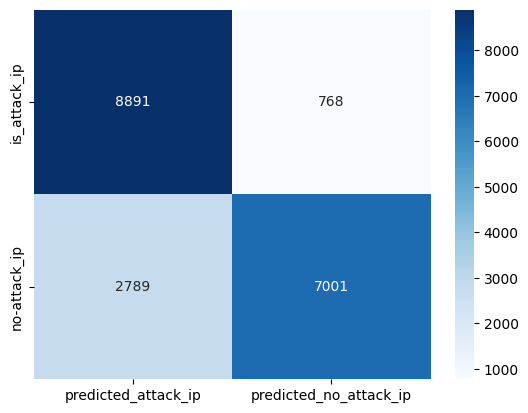

In [41]:
sns.heatmap(confusion,annot=True,cmap='Blues', fmt='g')

In [42]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        -1.0       0.76      0.92      0.83      9659
         1.0       0.90      0.72      0.80      9790

    accuracy                           0.82     19449
   macro avg       0.83      0.82      0.82     19449
weighted avg       0.83      0.82      0.82     19449



### One-Class SVM Classification

In [43]:
from sklearn.svm import OneClassSVM
# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train, y_train)

In [44]:
# Predict the anomalies
prediction = one_class_svm.predict(X_test)

In [45]:
cm = np.array(confusion_matrix(y_test, prediction, labels=[-1,1]))
confusion = pd.DataFrame(cm, index=['is_attack_ip', 'no-attack_ip'],
                         columns=['predicted_attack_ip','predicted_no_attack_ip'])
confusion

,predicted_attack_ip,predicted_no_attack_ip
is_attack_ip,196,9463
no-attack_ip,228,9562


<Axes: >

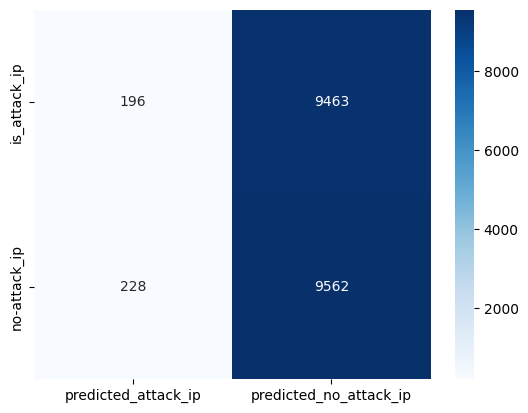

In [46]:
sns.heatmap(confusion,annot=True,cmap='Blues', fmt='g')

In [47]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        -1.0       0.46      0.02      0.04      9659
         1.0       0.50      0.98      0.66      9790

    accuracy                           0.50     19449
   macro avg       0.48      0.50      0.35     19449
weighted avg       0.48      0.50      0.35     19449



### Neural-Network Model

In [48]:
#importing keras
import keras
#importing sequential module
from keras.models import Sequential
# import dense module for hidden layers
from keras.layers import Dense
#importing activation functions
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
import tensorflow as tf



In [49]:
#creating model
model = Sequential()

In [50]:
model.add(tf.keras.Input(shape=(X_train.shape[1],))) 
model.add(tf.keras.layers.Dense(units=9, kernel_initializer='he_uniform', activation='sigmoid', input_dim=30)) 
model.add(tf.keras.layers.Dense(units=9, kernel_initializer='he_uniform', activation='sigmoid')) 
#model.add(Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=1, kernel_initializer='he_uniform', activation='sigmoid'))
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 477       
                                                                 
 dense_1 (Dense)             (None, 9)                 90        
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [51]:
classifier = model.fit(X_train, y_train, batch_size=100, epochs=25)


Epoch 1/25
584/584 [==============================] - 2s 2ms/step - loss: 0.1974 - accuracy: 0.0578
Epoch 2/25
584/584 [==============================] - 1s 2ms/step - loss: -0.6525 - accuracy: 0.0258
Epoch 3/25
584/584 [==============================] - 1s 2ms/step - loss: -1.7785 - accuracy: 0.1741
Epoch 4/25
584/584 [==============================] - 1s 2ms/step - loss: -2.9056 - accuracy: 0.2906
Epoch 5/25
584/584 [==============================] - 1s 2ms/step - loss: -3.9129 - accuracy: 0.3277
Epoch 6/25
584/584 [==============================] - 2s 3ms/step - loss: -4.8490 - accuracy: 0.3295
Epoch 7/25
584/584 [==============================] - 2s 3ms/step - loss: -5.7516 - accuracy: 0.3296
Epoch 8/25
584/584 [==============================] - 1s 2ms/step - loss: -6.6350 - accuracy: 0.3298
Epoch 9/25
584/584 [==============================] - 1s 2ms/step - loss: -7.5058 - accuracy: 0.3298
Epoch 10/25
584/584 [==============================] - 1s 2ms/step - loss: -8.3704 - accurac

In [52]:
y_pred = model.predict(X_test)

608/608 [==============================] - 1s 1ms/step


In [53]:
#converting values
y_pred = (y_pred>0.5)
print(y_pred)

[[ True]
 [ True]
 [False]
 ...
 [ True]
 [ True]
 [ True]]


In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
print(cm)
print('score is:',score)


[[   0 9012  647]
 [   0    0    0]
 [   0 3261 6529]]
score is: 0.33569849349580955


dict_keys(['loss', 'accuracy'])


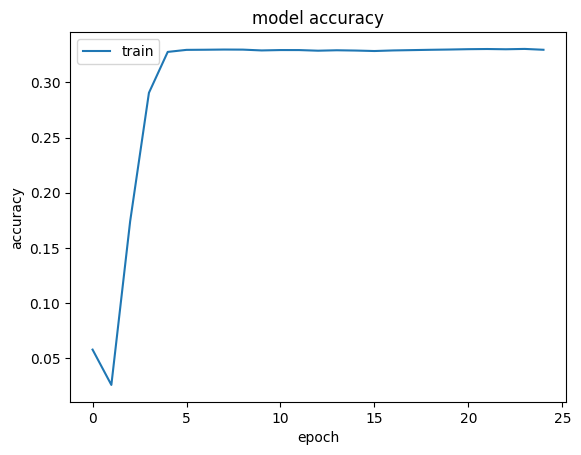

In [55]:
# list all data in history
print(classifier.history.keys())
# summarize history for accuracy
plt.plot(classifier.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

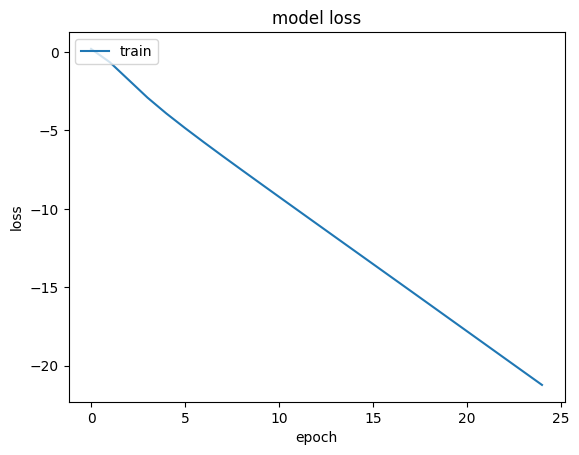

In [56]:
plt.plot(classifier.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Gaussian Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_gau = gnb.fit(X_train, y_train).predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
print(classification_report(y_test, y_pred_gau))

              precision    recall  f1-score   support

        -1.0       0.94      0.02      0.04      9659
         1.0       0.51      1.00      0.67      9790

    accuracy                           0.51     19449
   macro avg       0.73      0.51      0.36     19449
weighted avg       0.72      0.51      0.36     19449



### Bernoulli Naive Bayes

In [59]:
from sklearn.naive_bayes import BernoulliNB 
clf = BernoulliNB()
model = clf.fit(X_train, y_train)
y_pred_ber =clf.predict(X_test)
acc_score = accuracy_score(y_test, y_pred_ber)
print(acc_score)
print(classification_report(y_test, y_pred_ber))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7058974754486091
              precision    recall  f1-score   support

        -1.0       0.69      0.73      0.71      9659
         1.0       0.72      0.68      0.70      9790

    accuracy                           0.71     19449
   macro avg       0.71      0.71      0.71     19449
weighted avg       0.71      0.71      0.71     19449

